In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
import nltk
from nltk import tokenize

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

df = pd.read_csv("./quora_duplicate_questions.tsv",delimiter="\t").fillna("")
df.head() 

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


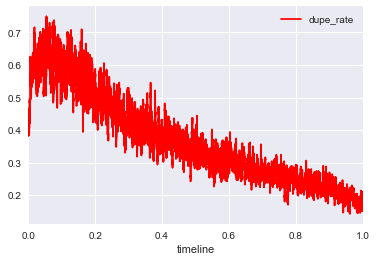

In [46]:
df["qmax"]      = df.apply( lambda row: max(row["qid1"], row["qid2"]), axis=1 )
df              = df.sort_values(by=["qmax"], ascending=True)
df["dupe_rate"] = df.is_duplicate.rolling(window=500, min_periods=500).mean()
df["timeline"]  = np.arange(df.shape[0]) / float(df.shape[0])

df.plot(x="timeline", y="dupe_rate", kind="line",color='r')
plt.savefig('./temporal.eps')
plt.show()

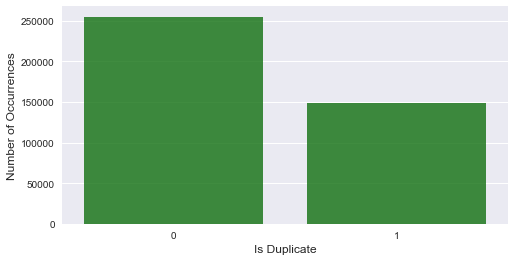

In [42]:
is_dup = df['is_duplicate'].value_counts()

plt.figure(figsize=(8,4))

sns.barplot(is_dup.index, is_dup.values, alpha=0.8, color='g')

plt.ylabel('Number of Occurrences', fontsize=12)

plt.xlabel('Is Duplicate', fontsize=12)

plt.savefig('./duplicate.eps')

plt.show()


Total number of question pairs for training: 404290
Postive Class (Duplicate pairs): 36.92%
Total number of questions in the training data: 537933
Number of questions that appear multiple times: 111780
()


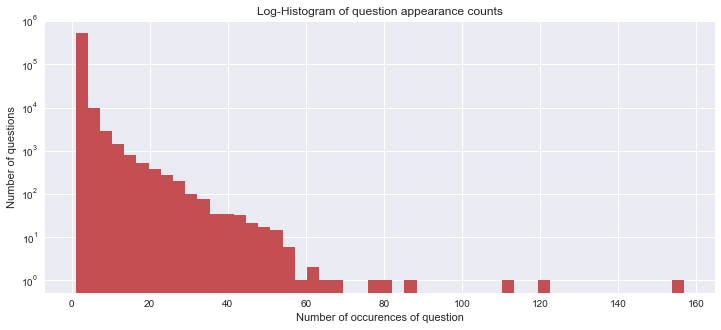

In [22]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50,color=pal[2])
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
plt.savefig('./appearance_counts.eps')
print()

mean-train 59.86 std-train 31.99  max-train 1169.00 


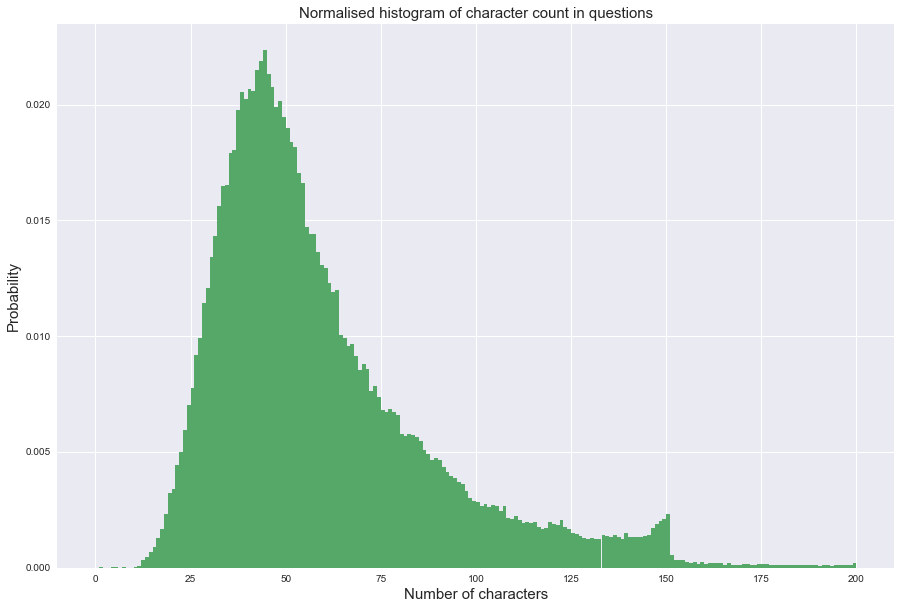

In [23]:
pal = sns.color_palette()
train_qs = pd.Series(df['question1'].tolist() + df['question2'].tolist()).astype(str)
dist_train = train_qs.apply(len)
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=200, range=[0, 200], color=pal[1], normed=True)
plt.title('Normalised histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.savefig('./character_counts.eps')



mean-train 11.06 std-train 5.89  max-train 237.00 


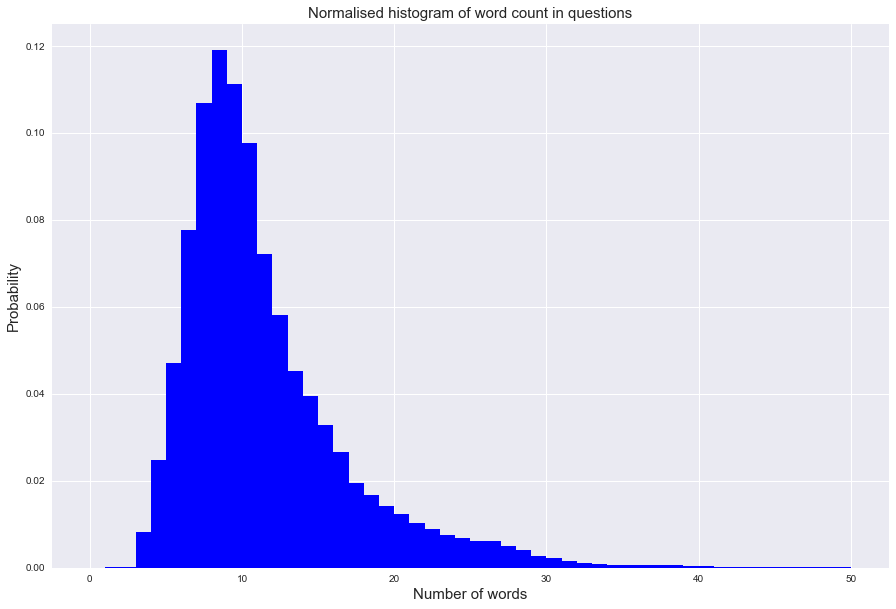

In [41]:
dist_train = train_qs.apply(lambda x: len(x.split(' ')))
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=50, range=[0, 50], color='b', normed=True)
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)
print('mean-train {:.2f} std-train {:.2f}  max-train {:.2f} '.format(dist_train.mean(), 
                          dist_train.std(), dist_train.max()))
plt.savefig('./word_counts.eps')



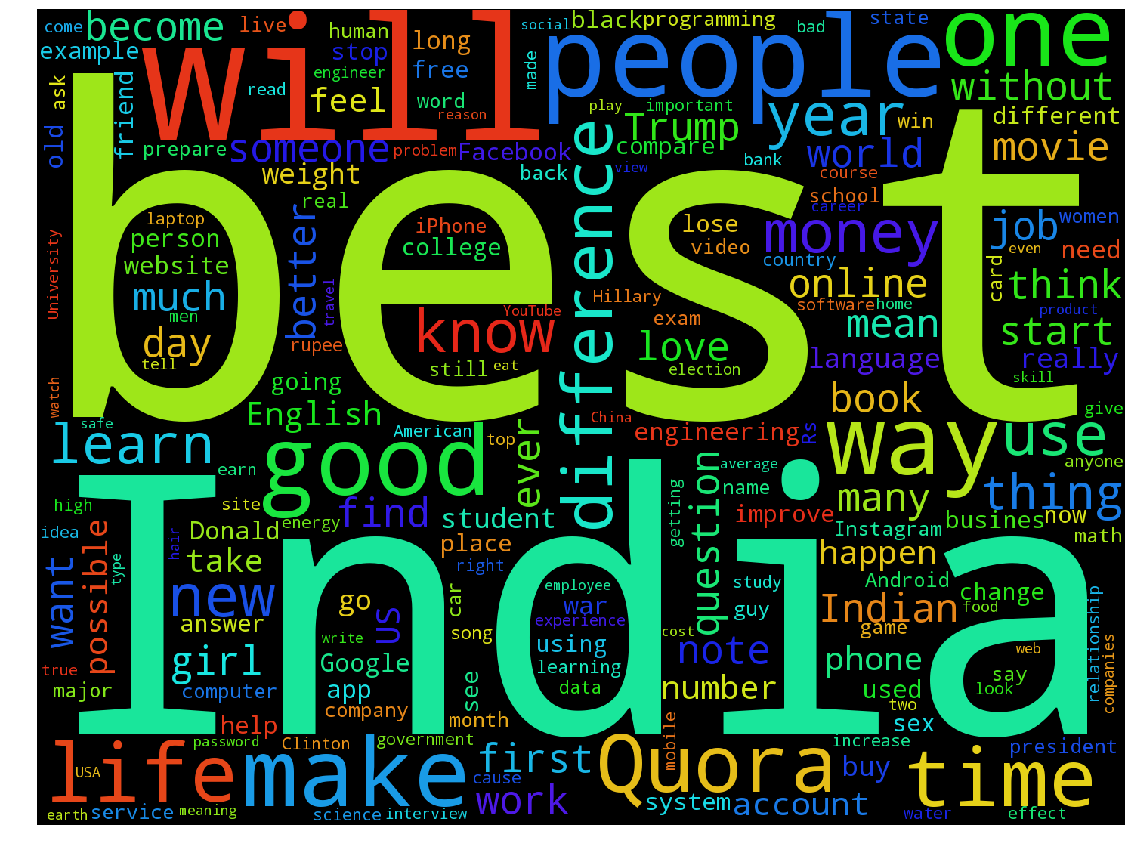

In [30]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
plt.savefig('./word_cloud.eps')



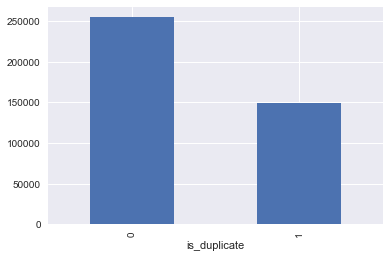

In [6]:
df.groupby("is_duplicate")['id'].count().plot.bar()

In [7]:
df['q1len'] = df['question1'].str.len()
df['q2len'] = df['question2'].str.len()

df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

def normalized_word_share(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))


df['word_share'] = df.apply(normalized_word_share, axis=1)
average_word_share = df["word_share"].mean()
average_q1_n_words = df["q1_n_words"].mean()
average_q2_n_words = df["q2_n_words"].mean()
print ("Average words share is: {}".format(average_word_share))
print("Average number of words in question 1: {}".format(average_q1_n_words)) 
print("Average number of words in question 2: {}".format(average_q2_n_words)) 
print("Number of duplicates(1) and non duplicates(0) in the dataSet")
print df['is_duplicate'].value_counts()
print('Average number of character length of q1: {}'.format(df["q1len"].mean()))
print('Average number of character length of q2: {}'.format(df["q2len"].mean()))
print("Maximum number of characters in q1:{}".format(df["q1len"].max()))
print("Maximum number of characters in q2:{}".format(df["q2len"].max()))
print("Minimum number of characters in q1:{}".format(df["q2len"].min()))
print("Minimum number of characters in q2:{}".format(df["q2len"].min()))
df.head()

Average words share is: 0.223361913502
Average number of words in question 1: 10.9445917534
Average number of words in question 2: 11.1851195924
Number of duplicates(1) and non duplicates(0) in the dataSet
0    255027
1    149263
Name: is_duplicate, dtype: int64
Average number of character length of q1: 59.5767790447
Average number of character length of q2: 60.143305548
Maximum number of characters in q1:623
Maximum number of characters in q2:1169
Minimum number of characters in q1:0
Minimum number of characters in q2:0


,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1_n_words,q2_n_words,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,0.434783
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,0.200000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,0.166667
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,0.100000


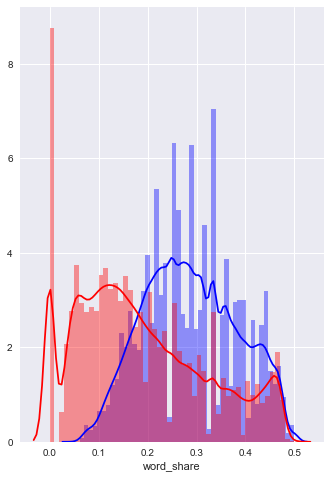

In [8]:
fig = plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'], color = 'blue')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'], color = 'red')
plt.savefig('./word_share.eps')

In [26]:
from IPython.display import display, HTML
df['q_n_words_avg'] = np.round((df['q1_n_words'] + df['q2_n_words'])/2.0).astype(int)
print(df['q_n_words_avg'].max())
df.head()


135


,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1_n_words,q2_n_words,word_share,q_n_words_avg
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,0.434783,13
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,0.200000,10
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,0.166667,12
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0.000000,10
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,0.100000,10


In [27]:
df_subsampled = df[0:5000]
trace = go.Scatter(
#     y =  df_subsampled[df_subsampled['q2_n_words']<200],
#     x =  df_subsampled[df_subsampled['q1_n_words']<60],
    y =  df_subsampled['q2_n_words'],
    x =  df_subsampled['q1_n_words'],
    mode='markers',
    marker=dict(
        size= df_subsampled['word_share'].values * 60,
        color = df_subsampled['is_duplicate'].values,
        colorscale='Portland',
        showscale=True,
        opacity=0.5,
        colorbar = dict(title = 'duplicate')
    ),
    text = np.round(df_subsampled['word_share'].values, decimals=2)
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Scatter plot of number of words in q1 and q2',
    xaxis=dict(
        title= 'Question 1 length',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False,
    ),
    yaxis=dict(
        title= 'Question 2 length',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterWords')


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
import nltk
from nltk import tokenize

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [8]:
df = pd.read_csv("~/Desktop/quoraPairs.csv",delimiter=",").fillna("")
df.head()

,question1,question2,is_duplicate,is_correct lstm,is_correct summed embeddings,Q1Length,Q2Length,Avg length
0,who is most cutest actress in bollywood?,who is the cutest actress in the bollywood?,1,False,True,9,10,9.5
1,what are signs my guy friend is flirting with me?,what are signs that your guy friend/ buddy is ...,1,False,False,12,23,17.5
2,how will the ban of 1000 and 500 rupee notes a...,what will be the impact in the indian economy ...,1,True,True,16,23,19.5
3,how do lose weight with healthy way?,how do i lose my weight from 58 to 50 kgs?,1,True,True,9,13,11.0
4,how many times a week should i work out?,how many days a week should i work out?,1,True,True,11,11,11.0


In [9]:
df["absoluteDiff"] = abs(df["Q1Length"]-df["Q2Length"])

In [18]:
df.head()
print df.shape

(60386, 9)


In [29]:
df.absoluteDiff.value_counts()

1     12590
0      9874
2      9246
3      6551
4      4602
5      3351
6      2635
7      1954
8      1612
9      1166
10     1053
11      845
12      704
13      644
14      510
15      461
16      408
17      353
18      304
19      269
20      239
21      204
22      152
23      150
24      120
25       77
26       63
27       55
28       45
30       35
29       27
32       20
31       20
33       15
34       12
35        7
37        5
38        3
39        2
36        2
40        1
Name: absoluteDiff, dtype: int64

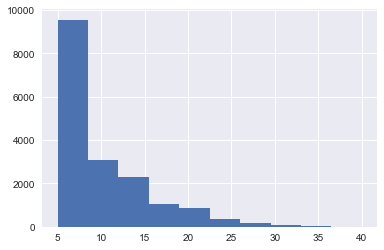

In [28]:
df[df.absoluteDiff>=5].absoluteDiff.hist()